In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
from sklearn.cluster import KMeans

In [4]:
iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
x = iris["data"]

In [17]:
x.shape

(150, 4)

In [9]:
y = iris["target"]

In [10]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [11]:
km = KMeans(n_clusters=3)

In [12]:
km.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
km.inertia_

78.851441426146

In [20]:
groups = km.labels_

In [19]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

In [21]:
g0 = np.where(groups == 0)
g1 = np.where(groups == 1)
g2 = np.where(groups == 2)

In [23]:
np.unique(y[g0], return_counts=True)    # G0  ------ C1

(array([1, 2]), array([48, 14]))

In [24]:
np.unique(y[g1], return_counts=True)    # G1 ---  C0

(array([0]), array([50]))

In [25]:
np.unique(y[g2], return_counts=True)    # G2 ------- C2

(array([1, 2]), array([ 2, 36]))

In [27]:
1 - 16 / 150

0.8933333333333333

In [28]:
inertias = []

for i in range(2, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

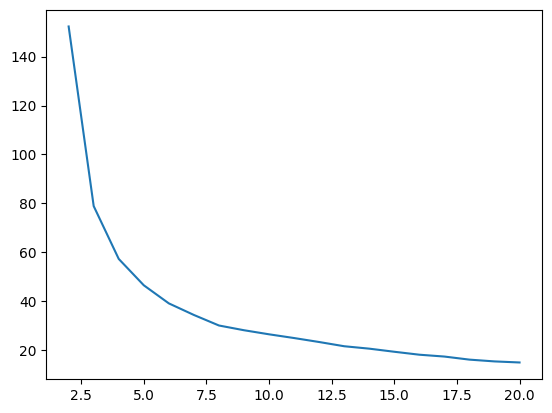

In [29]:
plt.plot(np.arange(2,21), inertias)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
sil_score = []

for i in range(2, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sil_score.append(silhouette_score(x, km.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

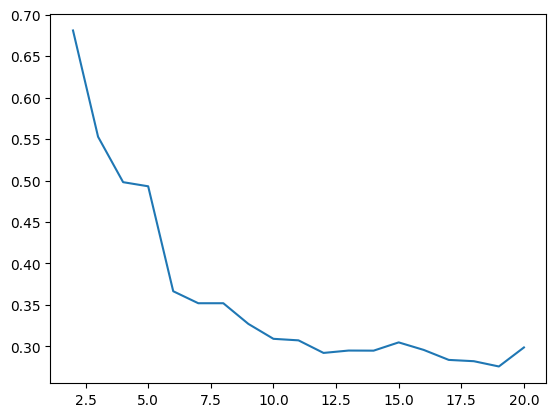

In [32]:
plt.plot(np.arange(2,21), sil_score)